<a href="https://colab.research.google.com/github/gauris26/Machine-Learning/blob/main/clustering/Clustering_KMean_Colegios_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geographic Location of Schools in Chile - WIP
## K-Means - Geographical Clustering

**Data Set**: [Localizacion geografica de colegios de Chile](https://www.kaggle.com/datasets/maxigaarp/localizacion-geografica-de-colegios-de-chile)

**Unnamed: 0:** Incremental Id\
**RBD**: The RBD, or code, of an elementary or secondary educational establishment in Chile.\
**NOM_RBD**: School name\
**NOM_COM_RBD**: Chile region name\
**query**: School Name + Region\
**lon**: Longitude [-180, 180]\
**lat**: Lattiude [-90, 90]

#### Using the K-Means algorithm for clustering geographical data, perform an Exploratory Data Analysis (EDA) process to detect outliers and missing data. From a Data analysis perspective, you may consider Isla de Pascua/Easter Island or the Chilean Antarctic Territory as outliers; however, from a geographical or administrative division standpoint, they actually belong to Chile.
#### You may find obvious outliers and incorrect data very soon, but I chose to proceed with applying clustering anyway, to explore how K-Means behaves

<img src="https://github.com/gauris26/Machine-Learning/blob/075bf0d8973d0e8d66ba8379c9d5f0e1a99c167d/clustering/images/Chile-World-Globe.png?raw=true" alt="Chile" width="400"/>


In [ ]:
import pandas as pd
colegios = pd.read_csv('https://raw.githubusercontent.com/gauris26/Machine-Learning/main/clustering/colesgeo.csv',encoding='iso-8859-1')

# Exploratory data analysis (EDA)

In [ ]:
colegios.head()

Unnamed: 0  RBD                              NOM_RBD NOM_COM_RBD  \
0           1    1              LICEO POLITECNICO ARICA       ARICA   
1           2    3  ESC. PEDRO VICENTE GUTIERREZ TORRES       ARICA   
2           3    4            LICEO OCTAVIO PALMA PEREZ       ARICA   
3           4    5             JOVINA NARANJO FERNANDEZ       ARICA   
4           5    7   L. POLI. ANTONIO VARAS DE LA BARRA       ARICA   

                                          query        lon        lat  
0              LICEO POLITECNICO ARICA ,  ARICA -70.294692 -18.487186  
1  ESC. PEDRO VICENTE GUTIERREZ TORRES ,  ARICA -70.302775 -18.486958  
2            LICEO OCTAVIO PALMA PEREZ ,  ARICA -70.307920 -18.474170  
3             JOVINA NARANJO FERNANDEZ ,  ARICA -70.313452 -18.476804  
4   L. POLI. ANTONIO VARAS DE LA BARRA ,  ARICA -70.287950 -18.475946

In [ ]:
colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9273 entries, 0 to 9272
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9273 non-null   int64  
 1   RBD          9273 non-null   int64  
 2   NOM_RBD      9273 non-null   object 
 3   NOM_COM_RBD  9273 non-null   object 
 4   query        9273 non-null   object 
 5   lon          9178 non-null   float64
 6   lat          9178 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 507.2+ KB


In [ ]:
#Detect if RBD is categorial data or no
colegios['RBD'].value_counts()

RBD
1        1
10686    1
10595    1
10596    1
10600    1
        ..
4983     1
4984     1
4985     1
4986     1
40459    1
Name: count, Length: 9273, dtype: int64

In [ ]:
#Remove u
colegios.drop('RBD', inplace=True,axis=1)
colegios.drop('Unnamed: 0', inplace=True,axis=1)
colegios.drop('NOM_RBD', inplace=True,axis=1)
colegios.drop('query', inplace=True,axis=1)

In [ ]:
colegios.isnull().sum()

NOM_COM_RBD     0
lon            95
lat            95
dtype: int64

In [ ]:
colegios.isnull().sum()/len(colegios)

NOM_COM_RBD    0.000000
lon            0.010245
lat            0.010245
dtype: float64

In [ ]:
colegios.dropna( axis = 0, subset = [ 'lon', 'lat' ], inplace = True )

In [ ]:
colegios.isnull().sum()/len(colegios)

NOM_COM_RBD    0.0
lon            0.0
lat            0.0
dtype: float64

In [ ]:
colegios.sample(5)

NOM_COM_RBD        lon        lat
1057  VALPARAISO -71.648720 -33.028720
8433    PUDAHUEL -70.770537 -33.429345
4406      OSORNO -73.155210 -40.576554
1519    COLTAUCO -71.057490 -34.265594
3140      ARAUCO -73.316831 -37.245538

In [ ]:
colegios['NOM_COM_RBD'].value_counts().sort_values()

NOM_COM_RBD
ANTARTICA           1
RIO VERDE           1
LAGUNA BLANCA       1
SAN GREGORIO        1
PRIMAVERA           1
                 ... 
PUENTE ALTO       130
VALPARAISO        133
VIï¿½A DEL MAR    134
LA FLORIDA        139
TEMUCO            147
Name: count, Length: 346, dtype: int64

In [ ]:
filasDuplicadas = colegios[colegios.duplicated()]
filasDuplicadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1268 entries, 6 to 9269
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOM_COM_RBD  1268 non-null   object 
 1   lon          1268 non-null   float64
 2   lat          1268 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.6+ KB


In [ ]:
colegios = colegios.drop_duplicates(ignore_index=True)

In [ ]:

colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOM_COM_RBD  7910 non-null   object 
 1   lon          7910 non-null   float64
 2   lat          7910 non-null   float64
dtypes: float64(2), object(1)
memory usage: 185.5+ KB


In [ ]:
colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOM_COM_RBD  7910 non-null   object 
 1   lon          7910 non-null   float64
 2   lat          7910 non-null   float64
dtypes: float64(2), object(1)
memory usage: 185.5+ KB


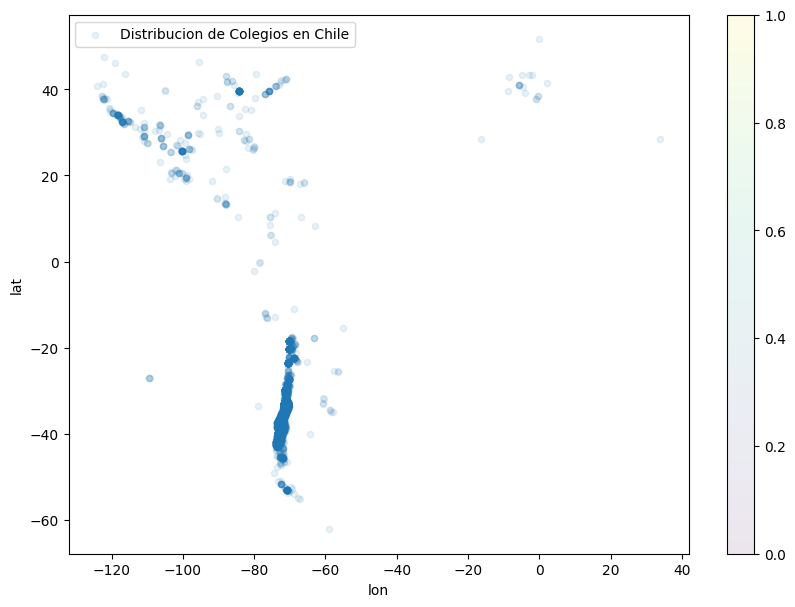

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

colegios.plot(kind="scatter", x="lon", y="lat", alpha=0.1,
        label="Distribucion de Colegios en Chile", figsize=(10, 7), colorbar=True,
      )
plt.legend()

In [ ]:
import folium

lat = colegios.iloc[0]['lat']
lng = colegios.iloc[0]['lon']
fig = folium.Figure(width=800, height=500)
map =  folium.Map(location=[0.4218574,-58.6984409], zoom_start=1.5)
for _, row in colegios.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_color='red',
        color='red'
    ).add_to(map)
fig.add_child(map)
fig

![image.png](https://github.com/gauris26/Machine-Learning/blob/main/clustering/images/Chila-Orography.png?raw=true)
![image.png](https://github.com/gauris26/Machine-Learning/blob/main/clustering/images/Chile-Isolated.png?raw=trueg)

In [ ]:
colegios['lat'].sort_values(ascending=False)

2617    51.655425
2431    47.608367
1495    46.319542
6380    46.222210
7573    43.684649
          ...    
4170   -53.834291
7054   -54.051096
4184   -54.934615
4185   -55.082978
4187   -62.200135
Name: lat, Length: 7910, dtype: float64

In [ ]:
colegios['lon'].sort_values(ascending=True)

6372   -124.195375
1792   -122.719231
3710   -122.714055
1702   -122.513621
3708   -122.495931
           ...    
2398     -0.478029
1970     -0.437527
2617     -0.212163
1605      2.174356
6955     33.974919
Name: lon, Length: 7910, dtype: float64

In [ ]:
colegios.loc[~(colegios['lat'] > -90.0) | ~(colegios['lat'] < 90.0)]

Empty DataFrame
Columns: [NOM_COM_RBD, lon, lat]
Index: []

In [ ]:
colegios.loc[~(colegios['lon'] > -180.0) | ~(colegios['lon'] < 180.0)]

Empty DataFrame
Columns: [NOM_COM_RBD, lon, lat]
Index: []

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
geo_features = colegios[['lat', 'lon']]

silhouette_scores_list = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i,n_init=10, max_iter=3000)
  kmeans.fit(geo_features)
  silhouette_scores_list.append(silhouette_score(geo_features, kmeans.labels_))

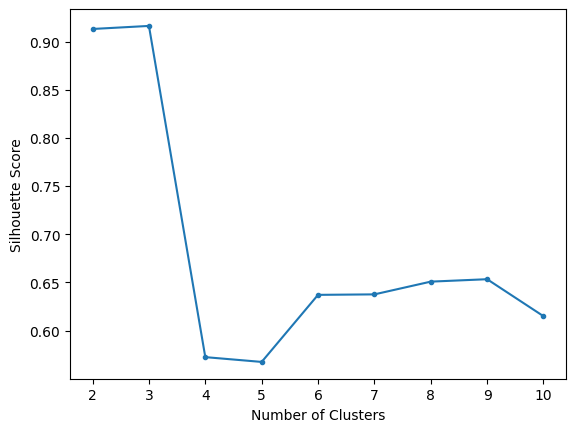

In [ ]:
# Visualize scores
plt.plot(range(2, 11), silhouette_scores_list, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

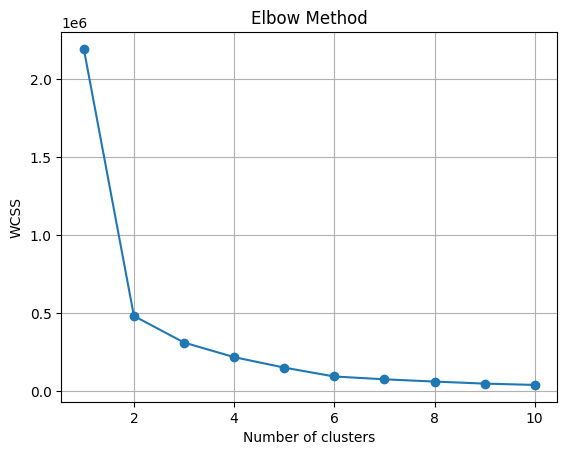

In [ ]:
wcss = []
for i in range(1, 11):  # Probamos de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10, max_iter=3000)
    kmeans.fit(geo_features)
    wcss.append(kmeans.inertia_)  # Inertia es el WCSS

# Graficar los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10, max_iter=3000)
kmeans.fit_predict(geo_features)
labels = kmeans.labels_
colegios['cluster'] = labels

In [ ]:
_clusters = colegios.groupby('cluster')['NOM_COM_RBD'].count()
print(_clusters)

cluster
0    7541
1     349
2      20
Name: NOM_COM_RBD, dtype: int64


In [ ]:
import folium
colors = ['red', 'blue', 'green', 'purple' ]
lat = colegios.iloc[0]['lat']
lng = colegios.iloc[0]['lon']

fig = folium.Figure(width=800, height=500)
map =  folium.Map(location=[0.4218574,-58.6984409], zoom_start=2)
for _, row in colegios.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_color=colors[int(row["cluster"])],
        color=colors[int(row["cluster"])]
    ).add_to(map)
fig.add_child(map)
fig

In [ ]:
colegios['hemisferio'] = pd.cut(x=colegios['lat'], bins=[-90, 0, 90],labels=['sur', 'norte'])

In [ ]:
colegios['hemisferio'].value_counts()

hemisferio
sur      7541
norte     369
Name: count, dtype: int64

In [ ]:
colegios_solo_hemisferio_sur = colegios.loc[colegios['hemisferio'] == 'sur'].reset_index(drop=True)

In [ ]:
colegios_solo_hemisferio_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7541 entries, 0 to 7540
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NOM_COM_RBD  7541 non-null   object  
 1   lon          7541 non-null   float64 
 2   lat          7541 non-null   float64 
 3   cluster      7541 non-null   int32   
 4   hemisferio   7541 non-null   category
dtypes: category(1), float64(2), int32(1), object(1)
memory usage: 213.8+ KB


In [ ]:
colegios_solo_hemisferio_sur = colegios_solo_hemisferio_sur.drop('hemisferio', axis=1)

In [ ]:
import folium

lat = colegios_solo_hemisferio_sur.iloc[0]['lat']
lng = colegios_solo_hemisferio_sur.iloc[0]['lon']

fig = folium.Figure(width=400, height=500)
eda_map = folium.Map(location=[-36.739055, -71.0574941], zoom_start=3)
for _, row in colegios_solo_hemisferio_sur.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_color='red',
        color='red'
    ).add_to(eda_map)
fig.add_child(eda_map)
fig

In [ ]:
colegios_solo_hemisferio_sur = colegios_solo_hemisferio_sur.loc[colegios_solo_hemisferio_sur['lat'] < -17.4449048].reset_index(drop=True)

In [ ]:
colegios_solo_hemisferio_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NOM_COM_RBD  7529 non-null   object  
 1   lon          7529 non-null   float64 
 2   lat          7529 non-null   float64 
 3   cluster      7529 non-null   int32   
 4   hemisferio   7529 non-null   category
dtypes: category(1), float64(2), int32(1), object(1)
memory usage: 213.5+ KB


In [ ]:
import folium

lat = colegios_solo_hemisferio_sur.iloc[0]['lat']
lng = colegios_solo_hemisferio_sur.iloc[0]['lon']

fig = folium.Figure(width=300, height=500)
eda_map = folium.Map(location=[-36.739055, -71.0574941], zoom_start=3)
for _, row in colegios_solo_hemisferio_sur.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_color='red',
        color='red'
    ).add_to(eda_map)
fig.add_child(eda_map)
fig

In [ ]:
colegios_solo_hemisferio_sur = colegios_solo_hemisferio_sur.loc[
    (colegios_solo_hemisferio_sur['lon'] < -66.5394029) |
    ~(colegios_solo_hemisferio_sur['lat'] > -46.038523)
].reset_index(drop=True)

In [ ]:
colegios_solo_hemisferio_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NOM_COM_RBD  7513 non-null   object  
 1   lon          7513 non-null   float64 
 2   lat          7513 non-null   float64 
 3   cluster      7513 non-null   int32   
 4   hemisferio   7513 non-null   category
dtypes: category(1), float64(2), int32(1), object(1)
memory usage: 213.0+ KB


In [ ]:
import folium

lat = colegios_solo_hemisferio_sur.iloc[0]['lat']
lng = colegios_solo_hemisferio_sur.iloc[0]['lon']
fig = folium.Figure(width=300, height=500)
eda_map = folium.Map(location=[-36.739055, -71.0574941], zoom_start=3)
for _, row in colegios_solo_hemisferio_sur.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_color='red',
        color='red'
    ).add_to(eda_map)
fig.add_child(eda_map)
fig

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
geo_features = colegios_solo_hemisferio_sur[['lat', 'lon']]

silhouette_scores_list = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i,n_init=10, max_iter=3000)
  kmeans.fit(geo_features)
  silhouette_scores_list.append(silhouette_score(geo_features, kmeans.labels_))

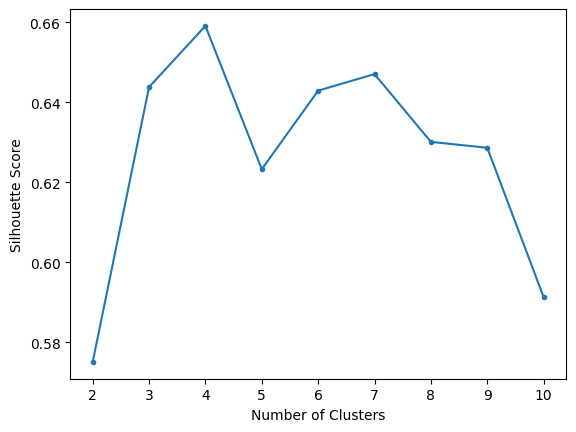

In [ ]:
# Visualize scores
plt.plot(range(2, 11), silhouette_scores_list, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

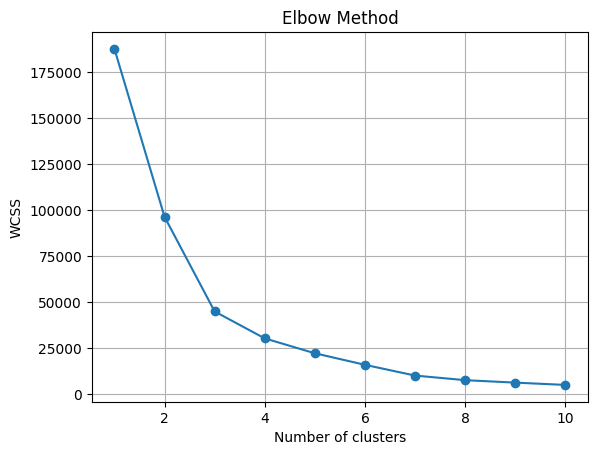

In [ ]:
wcss = []
for i in range(1, 11):  # Probamos de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10, max_iter=3000)
    kmeans.fit(geo_features)
    wcss.append(kmeans.inertia_)  # Inertia es el WCSS

# Graficar los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
colegios_solo_chile = colegios_solo_hemisferio_sur.drop('cluster', axis=1)

In [ ]:
colegios_solo_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NOM_COM_RBD  7513 non-null   object  
 1   lon          7513 non-null   float64 
 2   lat          7513 non-null   float64 
 3   hemisferio   7513 non-null   category
dtypes: category(1), float64(2), object(1)
memory usage: 183.7+ KB


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10, max_iter=3000)
kmeans.fit_predict(geo_features)
labels = kmeans.labels_
colegios_solo_chile['cluster'] = labels

In [ ]:
colegios_solo_chile.head()

NOM_COM_RBD        lon        lat hemisferio  cluster
0       ARICA -70.294692 -18.487186        sur        2
1       ARICA -70.302775 -18.486958        sur        2
2       ARICA -70.307920 -18.474170        sur        2
3       ARICA -70.313452 -18.476804        sur        2
4       ARICA -70.287950 -18.475946        sur        2

In [ ]:
import folium
colors = ['red', 'blue', 'green', 'purple','orange' ]
lat = colegios_solo_chile.iloc[0]['lat']
lng = colegios_solo_chile.iloc[0]['lon']
fig = folium.Figure(width=300, height=500)
map =  folium.Map(location=[-38.9565047,-71.8444799], zoom_start=3)
for _, row in colegios_solo_chile.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        weight=2,
        fill=True,
        fill_opacity=0.1,
        fill_color=colors[int(row["cluster"])],
        color=colors[int(row["cluster"])]
    ).add_to(map)
fig.add_child(map)
fig

![image.png](https://github.com/gauris26/Machine-Learning/blob/main/clustering/images/Chile-Zones.png?raw=true)